In [1]:
import d3ploy.tester as tester
import d3ploy.plotter as plotter
import matplotlib.pyplot as plt
from collections import Counter
from cycler import cycler
import numpy as np

In [39]:
def format_agent_dict(output_file,simple=True): 
    if simple:
        in_agent = ['lwr1',
                    'lwr2',
                    'lwr3',
                    'lwr4',
                    'lwr5',
                    'lwr6',
                    'lwr7',
                    'lwr8',
                    'lwr9',
                    'lwr10',
                    'enrichment',
                    'source',
                    'lwrstorage',
                    'lwrreprocessing',
                    'lwrmixer',
                    'lwrsink',
                    'fr',
                    'frstorage',
                    'frreprocessing',
                    'frsink']
    else: 
        in_agent = ['lwr1',
                    'lwr2',
                    'lwr3',
                    'lwr4',
                    'lwr5',
                    'lwr6',
                    'lwr7',
                    'lwr8',
                    'lwr9',
                    'lwr10',
                    'enrichment',
                    'source',
                    'lwrstorage',
                    'lwrreprocessing',
                    'lwrmixer',
                    'lwrsink',
                    'moxlwr',
                    'moxmixer',
                    'frmixer',
                    'fr',
                    'moxstorage',
                    'frstorage',
                    'moxreprocessing',
                    'frreprocessing',
                    'frsink',
                   'moxsink']
    agent_dict = tester.get_agent_dict(output_file,in_agent)
    if simple: 
        prototypes = ['source',
                'enrichment',
                'lwr',
                'lwrstorage',
                'lwrreprocessing',
                'lwrmixer',
                'lwrsink',
                'fr',
                'frstorage',
                'frreprocessing',
                'frsink']
    else: 
        prototypes = ['enrichment',
                    'source',
                    'lwrstorage',
                    'lwrreprocessing',
                    'lwrmixer',
                    'lwrsink',
                    'moxlwr',
                    'moxmixer',
                    'frmixer',
                    'fr',
                    'moxstorage',
                    'frstorage',
                    'moxreprocessing',
                    'frreprocessing',
                    'frsink',
                     'moxsink']
    agent_dict['lwr'] = {}
    for x in range(10): 
        name = 'lwr'+str(x+1)
        if x == 0:
            agent_dict['lwr'] = Counter(agent_dict[name].copy())
        else:
            agent_dict['lwr'] += Counter(agent_dict[name])
        del agent_dict[name]
    t = list(agent_dict[prototypes[0]].keys())
    prototypes.reverse()
    for x in prototypes: 
        if len(agent_dict[x]) < len(agent_dict[prototypes[0]]): 
            for key in agent_dict[prototypes[0]]: 
                if agent_dict[x].get(key) == None: 
                    agent_dict[x][key] = 0
    return agent_dict

In [43]:
def plot_agents(all_agents,name,simple=True):
    fig, ax = plt.subplots(figsize=(15,7))
    ax.grid(alpha=0.7)
    ax.set_xlim(0,1450)
    ax.set_xlabel('Months')
    ax.set_ylabel('Number of Agents in Simulation')
    if simple: 
        ax.stackplot(all_agents['lwr'].keys(),
                     all_agents['lwr'].values(),
                     all_agents['fr'].values())
        ax.legend(['lwr','sfr'],bbox_to_anchor=(1.1, 1))
    else: 
        ax.stackplot(all_agents['lwr'].keys(),
                     all_agents['lwr'].values(),
                     all_agents['fr'].values(),
                     all_agents['moxlwr'].values())
        ax.legend(['lwr','sfr','moxlwr'],bbox_to_anchor=(1.1, 1))
    ax.set_title('No. of Reactor Facilities in simulation at each time step')
    plt.savefig(name+'_reactor',dpi=300,bbox_inches='tight')
    plt.show()
    if simple: 
        prototypes = ['enrichment',
                    'source',
                    'lwrstorage',
                    'lwrreprocessing',
                    'lwrmixer',
                    'lwrsink',
                    'frstorage',
                    'frreprocessing',
                    'frsink']
    else: 
        prototypes = ['enrichment',
                      'source',
                    'lwrstorage',
                    'lwrreprocessing',
                      'lwrsink',
                    'lwrmixer',
                      'frmixer',
                    'moxmixer',
                      'frstorage',
                    'moxstorage',
                      'frreprocessing',
                    'moxreprocessing',
                    'frsink',
                     'moxsink']
    fig, ax = plt.subplots(figsize=(15,7))
    ax.grid(alpha=0.7)
    ax.set_xlim(0,1450)
    ax.set_xlabel('Months')
    ax.set_ylabel('Number of Agents in Simulation')
    if simple: 
        ax.stackplot(all_agents[prototypes[0]].keys(),
                     all_agents[prototypes[0]].values(),
                     all_agents[prototypes[1]].values(),
                     all_agents[prototypes[2]].values(),
                     all_agents[prototypes[3]].values(),
                     all_agents[prototypes[4]].values(),
                     all_agents[prototypes[5]].values(),
                     all_agents[prototypes[6]].values(),
                     all_agents[prototypes[7]].values(),
                     all_agents[prototypes[8]].values(),)
    else: 
        ax.stackplot(all_agents[prototypes[0]].keys(),
                     all_agents[prototypes[0]].values(),
                     all_agents[prototypes[1]].values(),
                     all_agents[prototypes[2]].values(),
                     all_agents[prototypes[3]].values(),
                     all_agents[prototypes[4]].values(),
                     all_agents[prototypes[5]].values(),
                     all_agents[prototypes[6]].values(),
                     all_agents[prototypes[7]].values(),
                     all_agents[prototypes[8]].values(),
                     all_agents[prototypes[9]].values(),
                     all_agents[prototypes[10]].values(),
                     all_agents[prototypes[11]].values(),
                     all_agents[prototypes[12]].values(),
                     all_agents[prototypes[13]].values())
    ax.legend(prototypes,bbox_to_anchor=(1.16, 1))
    ax.set_title('No. of Supporting Facilities in simulation at each time step')
    plt.savefig(name+'_support',dpi=300,bbox_inches='tight')
    plt.show()


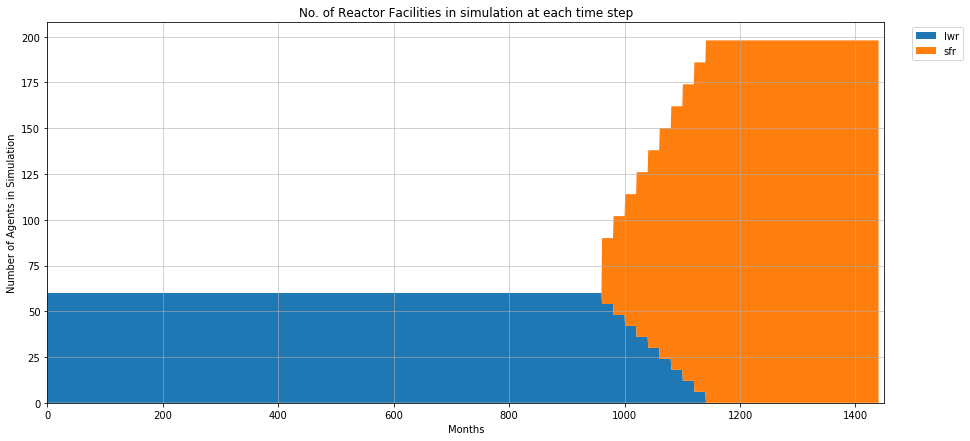

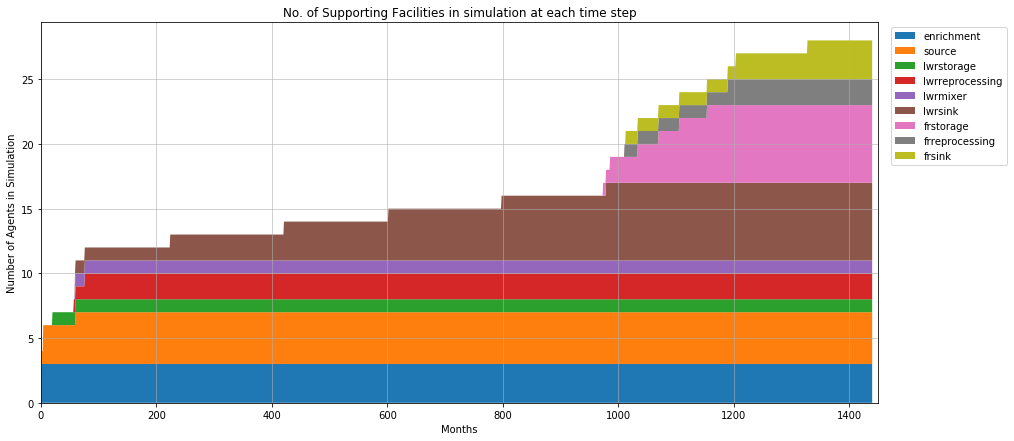

In [44]:
sqlite23= 'eg01-eg23-flatpower-d3ploy-buffer0-S1-poly.sqlite'
all_agents23 = format_agent_dict(sqlite23)
plot_agents(all_agents23,name='eg23-stack')

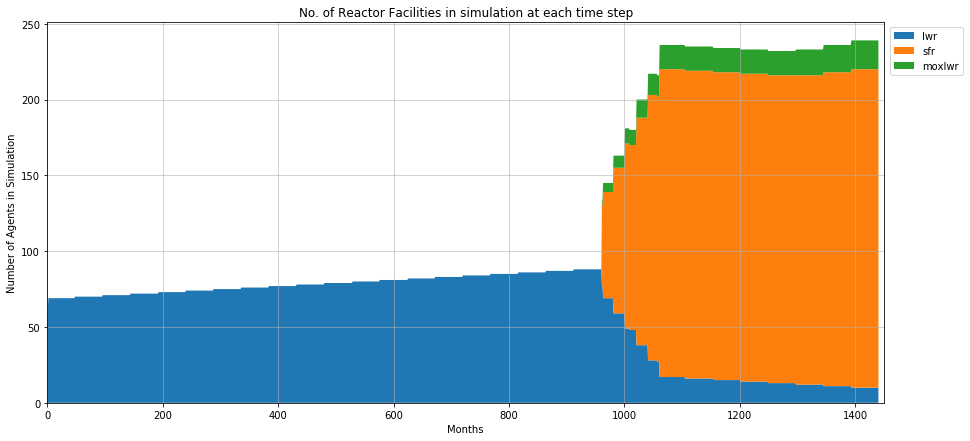

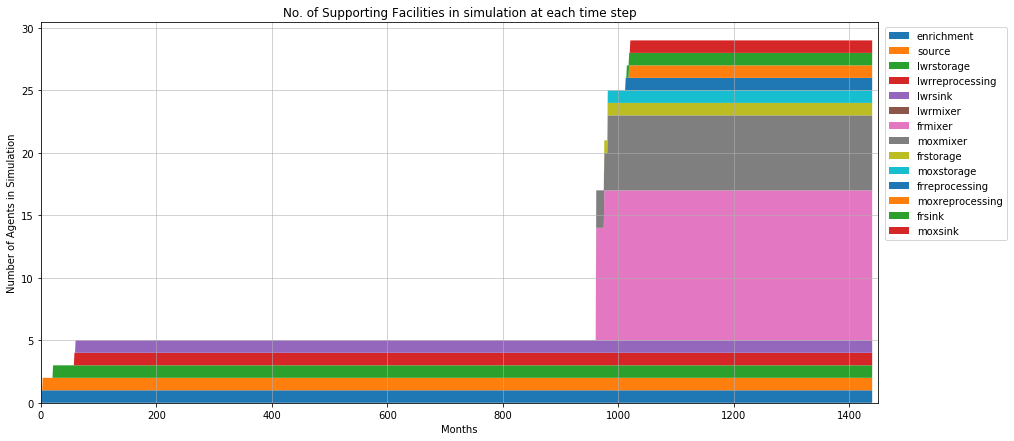

In [45]:
sqlite30 = 'eg01-eg30-linpower-d3ploy-buffer8000-fft.sqlite'
all_agents30 = format_agent_dict(sqlite30,simple=False)
plot_agents(all_agents30,name='eg30-stack',simple=False)